In [147]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [2]:
np.load('proyecto_training_data.npy')
datos = np.load('proyecto_training_data.npy')
pd.DataFrame((datos),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [13]:
print(len(datos))
operacion = 1460*0.80
print(operacion)
cantidad_entrenamiento = int(operacion)
cantidad_prueba = int(len(datos) - cantidad_entrenamiento)
print(f"la cantidad de filas de entrenamiento es: {cantidad_entrenamiento}")
print(f"la cantidad de filas de prueba es: {cantidad_prueba}")

1460
1168.0
la cantidad de filas de entrenamiento es: 1168
la cantidad de filas de prueba es: 292


In [43]:
data_entrenamiento = datos[:1168,:]
data_test = datos[1168:,:]
print(data_entrenamiento.shape)
print(data_test.shape)

(1168, 6)
(292, 6)


In [14]:
set_entrenamiento = datos[0:1168]
set_prueba = datos[1168:1460]
entrenamiento = pd.DataFrame((set_entrenamiento),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
entrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [15]:
prueba = pd.DataFrame((set_prueba),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
prueba

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0


## Analisis exploratorio

In [16]:
Analisis_datos = pd.DataFrame((datos),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
Analisis_datos.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [18]:
peak_to_peak= [datos[0].ptp(),datos[1].ptp(),datos[2].ptp(),datos[3].ptp(),datos[4].ptp(),datos[5].ptp()]
dato_ptp= pd.DataFrame([peak_to_peak],columns= ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
print("   Peak to Peak \n\n" ,

dato_ptp)

   Peak to Peak 

    SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208493.0     181494.0  223494.0      139993.0   249992.0     142995.0


## Histogramas

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\619038813.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  salePrice_hist = sns.distplot(salePrice_series, bins = 40,color='black').set_title("Histogram of SalePrice")


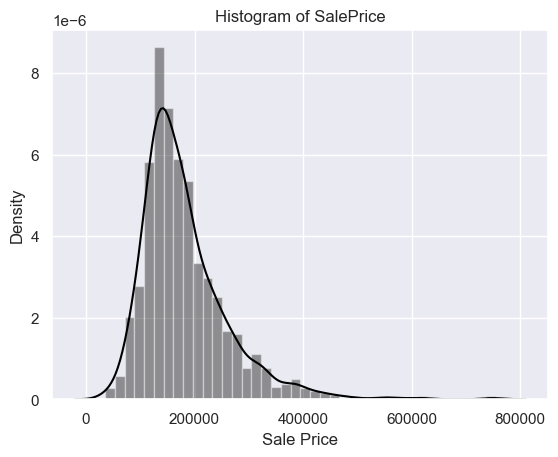

In [155]:
sns.set_theme()
salePrice_series = pd.Series(Analisis_datos['SalePrice'], name ="Sale Price")
salePrice_hist = sns.distplot(salePrice_series, bins = 40,color='black').set_title("Histogram of SalePrice")
plt.show()

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\109378619.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  OverallQual_hist = sns.distplot(OverallQual_series, bins = 40,color='black').set_title("Histogram of OverallQual")


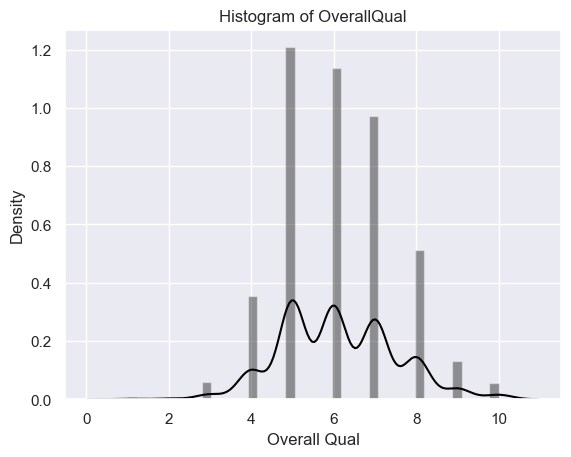

In [156]:
sns.set_theme()
OverallQual_series = pd.Series(Analisis_datos['OverallQual'], name ="Overall Qual")
OverallQual_hist = sns.distplot(OverallQual_series, bins = 40,color='black').set_title("Histogram of OverallQual")
plt.show()

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\1121905183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  FstFlrSF_hist = sns.distplot(FstFlrSF_series, bins = 40, color='black').set_title("Histogram of 1stFlrSF")


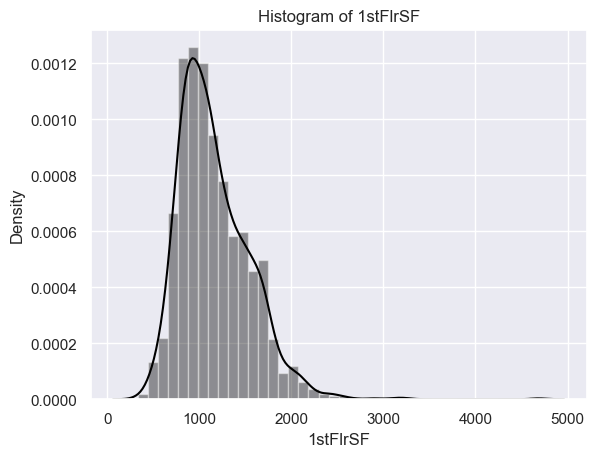

In [157]:
sns.set_theme()
FstFlrSF_series = pd.Series(Analisis_datos['1stFlrSF'], name ="1stFlrSF")
FstFlrSF_hist = sns.distplot(FstFlrSF_series, bins = 40, color='black').set_title("Histogram of 1stFlrSF")
plt.show()

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\1850703722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  TotRmsAbvGrd_hist = sns.distplot(TotRmsAbvGrd_series, bins = 40, color='black').set_title("Histogram of TotRmsAbvGrd")


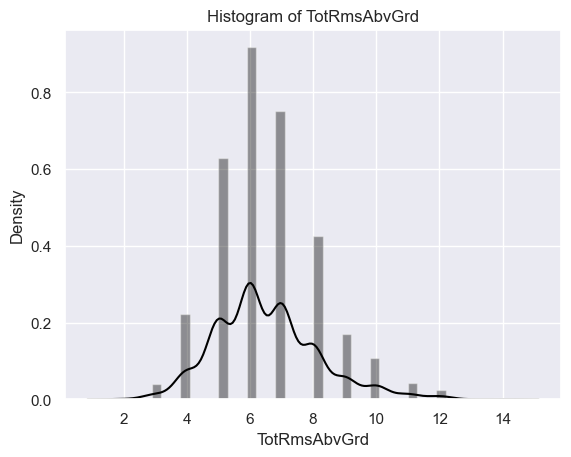

In [158]:
sns.set_theme()
TotRmsAbvGrd_series = pd.Series(Analisis_datos['TotRmsAbvGrd'], name ="TotRmsAbvGrd")
TotRmsAbvGrd_hist = sns.distplot(TotRmsAbvGrd_series, bins = 40, color='black').set_title("Histogram of TotRmsAbvGrd")
plt.show()

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\2599033057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  YearBuilt_hist = sns.distplot(YearBuilt_series, bins = 40, color='black').set_title("Histogram of YearBuilt")


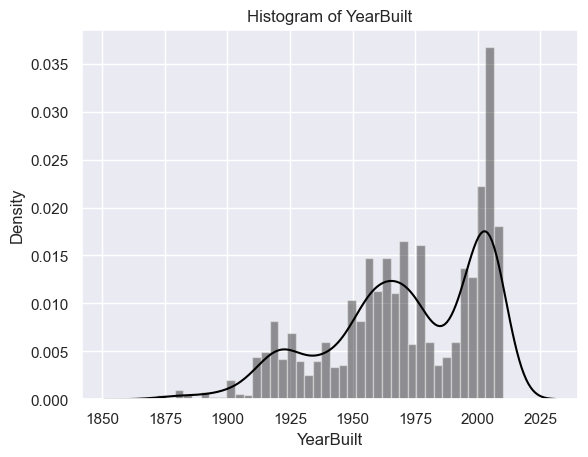

In [159]:
sns.set_theme()
YearBuilt_series = pd.Series(Analisis_datos['YearBuilt'], name ="YearBuilt")
YearBuilt_hist = sns.distplot(YearBuilt_series, bins = 40, color='black').set_title("Histogram of YearBuilt")
plt.show()

C:\Users\Marlon Daniel\AppData\Local\Temp\ipykernel_5992\2535315322.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  LotFrontaget_hist = sns.distplot(LotFrontage_series, bins = 40, color='black').set_title("Histogram of LotFrontage")


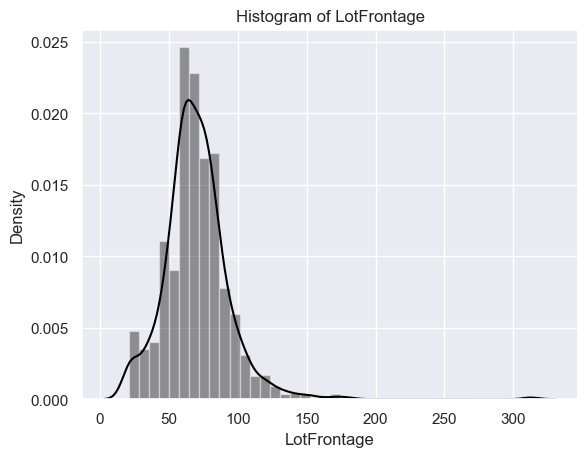

In [160]:
sns.set_theme()
LotFrontage_series = pd.Series(Analisis_datos['LotFrontage'], name ="LotFrontage")
LotFrontaget_hist = sns.distplot(LotFrontage_series, bins = 40, color='black').set_title("Histogram of LotFrontage")
plt.show()

## Correlación entre variables

In [25]:
corr_Overall = Analisis_datos.corr()
corr_Sales_Overall= round(corr_Overall['SalePrice']['OverallQual'],2)
corr_1stFlrSF = Analisis_datos.corr()
corr_Sales_1stFlrSF= round(corr_Overall['SalePrice']['1stFlrSF'],2)
corr_TotRmsAbvGrd = Analisis_datos.corr()
corr_Sales_TotRmsAbvGrd= round(corr_Overall['SalePrice']['TotRmsAbvGrd'],2)
corr_YearBuilt = Analisis_datos.corr()
corr_Sales_YearBuilt= round(corr_Overall['SalePrice']['YearBuilt'],2)
corr_LotFrontage = Analisis_datos.corr()
corr_Sales_LotFrontage= round(corr_Overall['SalePrice']['LotFrontage'],2)
resultado_correlaciones = {'Sales vs OverallQuall':corr_Sales_Overall,'Sales vs 1stFlrSF':corr_Sales_1stFlrSF,'Sales vs TotRmsAbvGrd':corr_Sales_TotRmsAbvGrd,
'Sales vs YearBuilt':corr_Sales_YearBuilt,'Sales vs LotFrontage':corr_Sales_LotFrontage}


Text(0.5, 1.0, 'Correlation SalesPrice and OverallQual = 0.79')

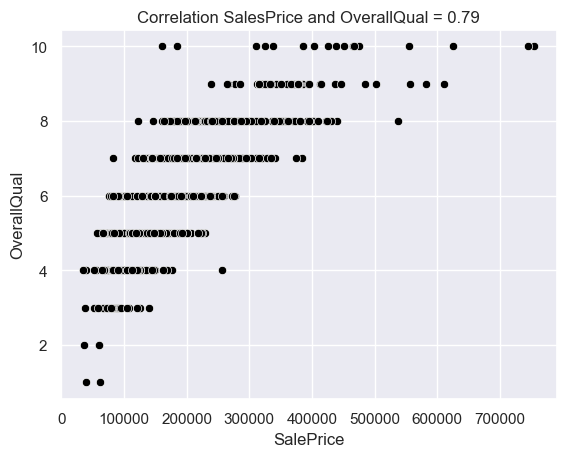

In [34]:
corr_sales_overall_graph = sns.scatterplot(x =Analisis_datos['SalePrice'],y =Analisis_datos['OverallQual'],color='black',data=Analisis_datos)
corr_sales_overall_graph.set_title("Correlation SalesPrice and OverallQual = " + str(corr_Sales_Overall))

Text(0.5, 1.0, 'Correlation SalesPrice and 1stFlrSF = 0.61')

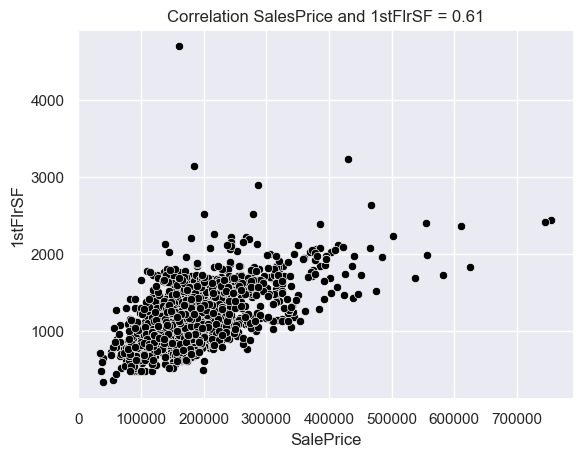

In [33]:
corr_sales_1stFlrSF_graph = sns.scatterplot(x =Analisis_datos['SalePrice'],y =Analisis_datos['1stFlrSF'],color='black',data=Analisis_datos)
corr_sales_1stFlrSF_graph.set_title("Correlation SalesPrice and 1stFlrSF = " + str(corr_Sales_1stFlrSF))

Text(0.5, 1.0, 'Correlation SalesPrice and TotRmsAbvGrd = 0.53')

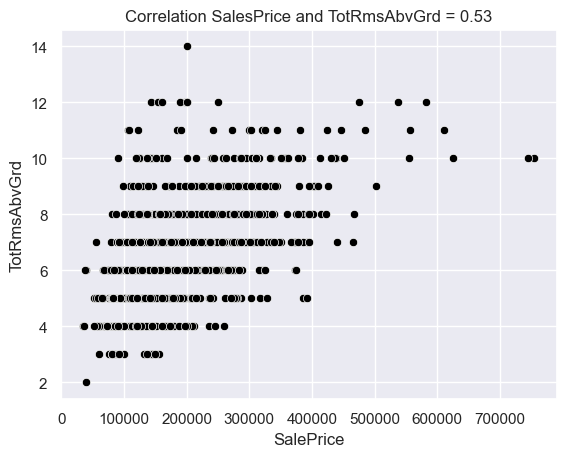

In [32]:
corr_sales_TotRmsAbvGrd_graph = sns.scatterplot(x =Analisis_datos['SalePrice'],y =Analisis_datos['TotRmsAbvGrd'],color='black',data=Analisis_datos)
corr_sales_TotRmsAbvGrd_graph.set_title("Correlation SalesPrice and TotRmsAbvGrd = " + str(corr_Sales_TotRmsAbvGrd))

Text(0.5, 1.0, 'Correlation SalesPrice and YearBuilt = 0.52')

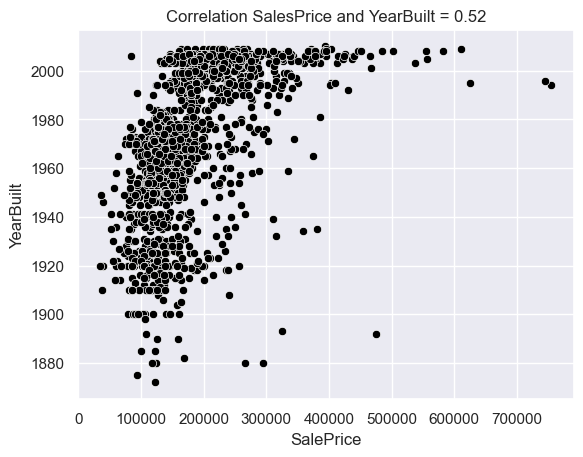

In [31]:
corr_sales_YearBuilt_graph = sns.scatterplot(x =Analisis_datos['SalePrice'],y =Analisis_datos['YearBuilt'],color='black',data=Analisis_datos)
corr_sales_YearBuilt_graph.set_title("Correlation SalesPrice and YearBuilt = " + str(corr_Sales_YearBuilt))

Text(0.5, 1.0, 'Correlation SalesPrice and LotFrontage = 0.35')

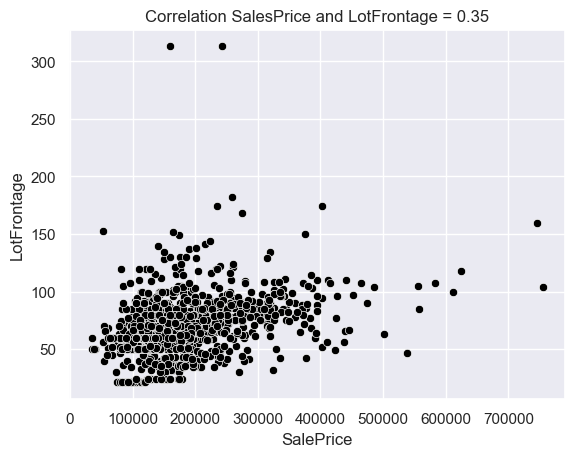

In [30]:
corr_sales_LotFrontage_graph = sns.scatterplot(x =Analisis_datos['SalePrice'],y =Analisis_datos['LotFrontage'],color='black', data=Analisis_datos)
corr_sales_LotFrontage_graph.set_title("Correlation SalesPrice and LotFrontage = " + str(corr_Sales_LotFrontage))

### Analizando correlaciones

In [35]:
corr_analisis = pd.DataFrame([[key,resultado_correlaciones[key]] for key in resultado_correlaciones.keys()],columns=['Variable','Valor Correlacion'] )
corr_analisis_orden = corr_analisis.sort_values('Valor Correlacion', ascending=False)
corr_analisis_orden

,Variable,Valor Correlacion
0,Sales vs OverallQuall,0.79
1,Sales vs 1stFlrSF,0.61
2,Sales vs TotRmsAbvGrd,0.53
3,Sales vs YearBuilt,0.52
4,Sales vs LotFrontage,0.35


## **Las 2 variables con mas correlacion son OverallQuall (0.79) y 1stFlrSF (0.61)**

### Funcion de entrenamiento (modelo de regresion lineal)
#### y = Bo +B1*x

In [208]:
def entre_function(x,y,epochs,imprimir_error_cada,learning_rate):
      mc = np.array([0.0,0.0])   
      x = x.reshape(len(x),1)
      unos = np.ones(len(x)).reshape(len(x),1)
      x = np.append(x,unos, axis = 1)
      error = np.zeros(epochs)
      modelo =np.ones((epochs,2))

#Iteraciones
      for i in range(epochs):
            yhat = np.dot(x,mc)
            error[i] = (np.average((y-yhat)**2))/2
#gradientes      
            grad = np.dot(yhat-y,x)/len(y)
#actualizacion paramentros
            mc -= ( learning_rate*grad)
            modelo[i] = mc
#Imprimir errores
            if ((i+1) % imprimir_error_cada) == 0:
                  print("Error iteracion : "+ str(i+1)+" "+str(error[i]))      
      return modelo, error


In [199]:
def grafica_error(error):
  n_iter = range(0,len(error))
  fig = plt.figure()
  graph_error = fig.add_subplot(222)
  graph_error.plot(n_iter , error, label = "error")
  graph_error.legend()
  graph_error.set_title("Losses")
  graph_error.set_xlabel("Iteración")
  graph_error.set_ylabel("Error")
  plt.show()

In [200]:
def grafica_modelo(x, y, modelo, n):
  x = x.reshape(len(x), 1)
  ones = np.ones(len(x)).reshape(len(x), 1)
  x_2 = np.append(x, ones, axis = 1)
  for i in range(0,len(modelo),n):
    yhat = np.dot(x_2,modelo[i])
    mc =  modelo[i]
    plt.scatter(x,y)
    plt.plot(x,yhat, color='r')
    plt.title("Iteración N = "+str(i+1)+" m="+str(mc[0])+" b="+str(mc[1])+"")
    plt.show()

### ENTRENAMIENTO DE VARIABLES

### Learning rate 0.001


Error iteracion : 2000 1352023229.4186523
Error iteracion : 4000 1316634167.5629728
Error iteracion : 6000 1287351116.9024622
Error iteracion : 8000 1263120549.2914023
Error iteracion : 10000 1243070711.8082504
Error iteracion : 12000 1226480263.3485403
Error iteracion : 14000 1212752322.6445026
Error iteracion : 16000 1201392994.0265186
Error iteracion : 18000 1191993598.3390508
Error iteracion : 20000 1184215969.7255323
Error iteracion : 22000 1177780289.298707
Error iteracion : 24000 1172455017.9834592
Error iteracion : 26000 1168048566.341952
Error iteracion : 28000 1164402401.6830084
Error iteracion : 30000 1161385344.4674244
Error iteracion : 32000 1158888848.8086843
Error iteracion : 34000 1156823097.2737398
Error iteracion : 36000 1155113769.4849298
Error iteracion : 38000 1153699368.2657266
Error iteracion : 40000 1152529007.1319637
Error iteracion : 42000 1151560579.528236
Error iteracion : 44000 1150759243.9433408
Error iteracion : 46000 1150096170.403154
Error iteracion : 4

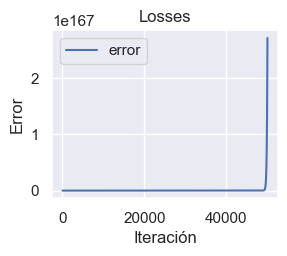

In [215]:
epochs = 50000
error = 2000
lr = 0.001
overall_test, errores_over = entre_function(data_entrenamiento[:,1],data_entrenamiento[:,0],epochs,error,lr)
graficar_error(errores)


### Graficar 

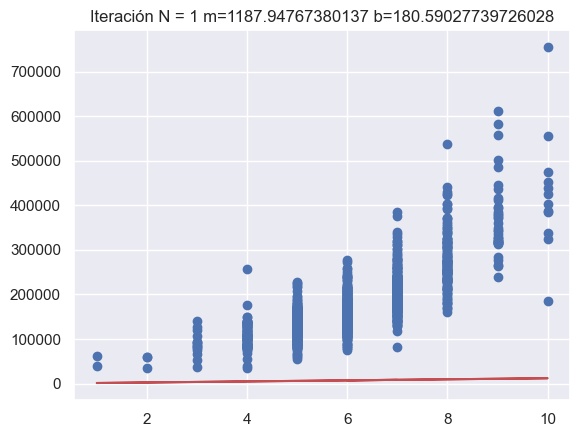

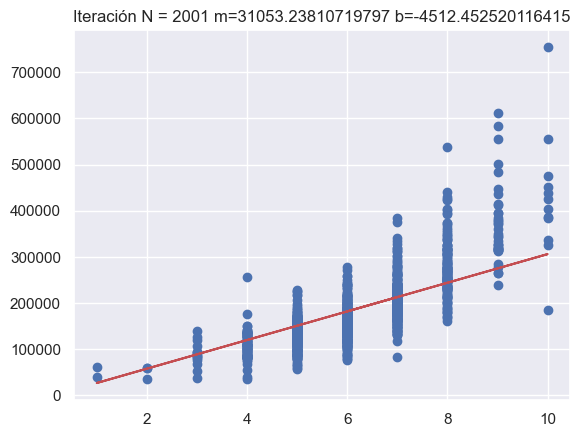

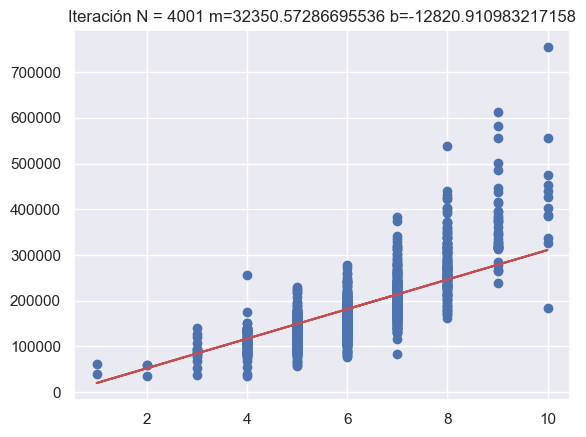

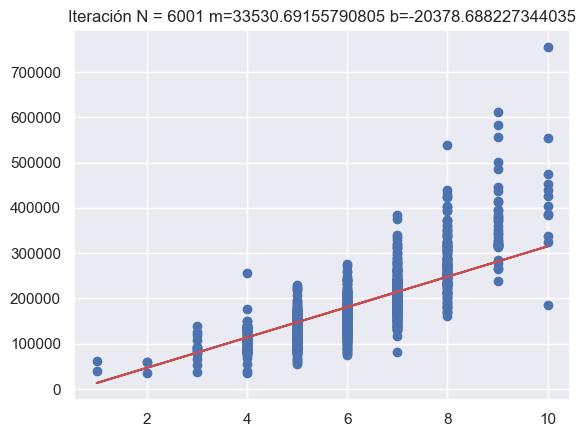

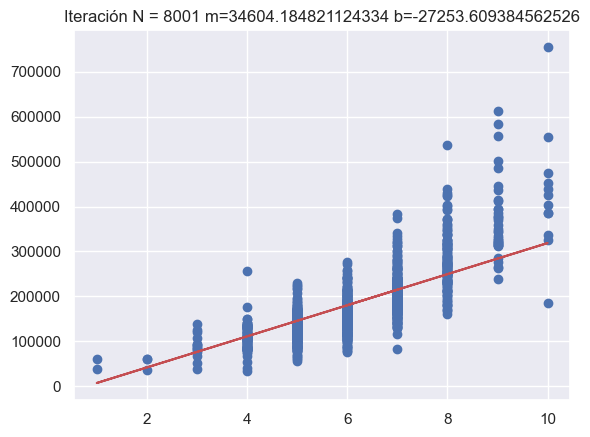

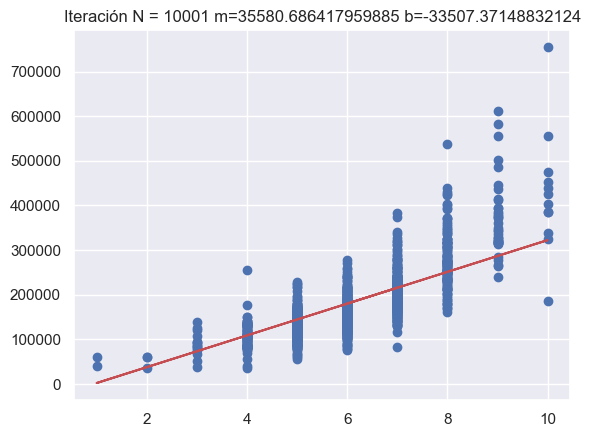

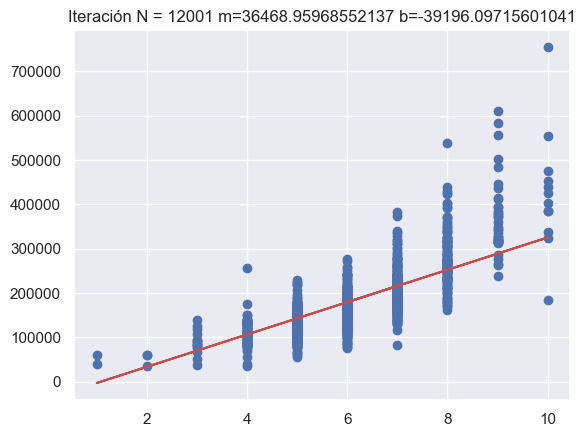

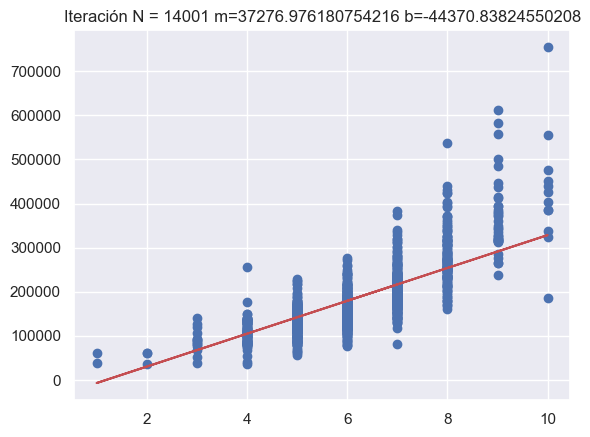

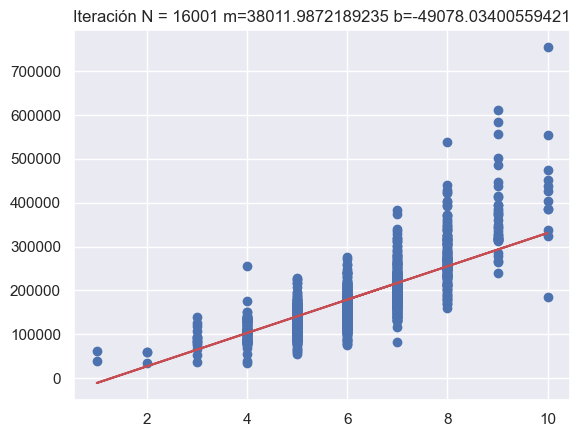

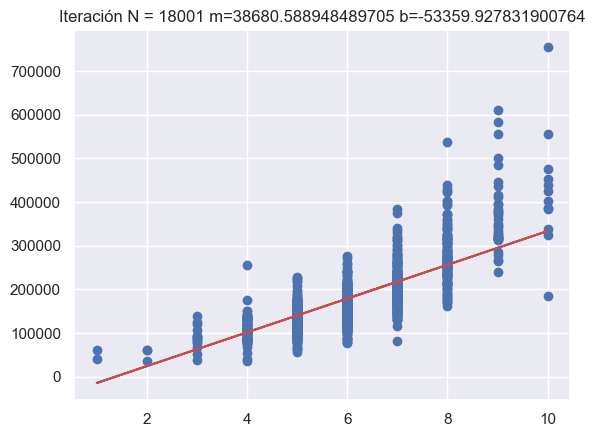

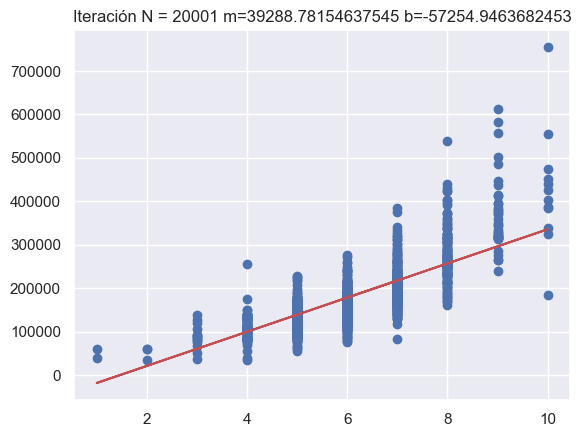

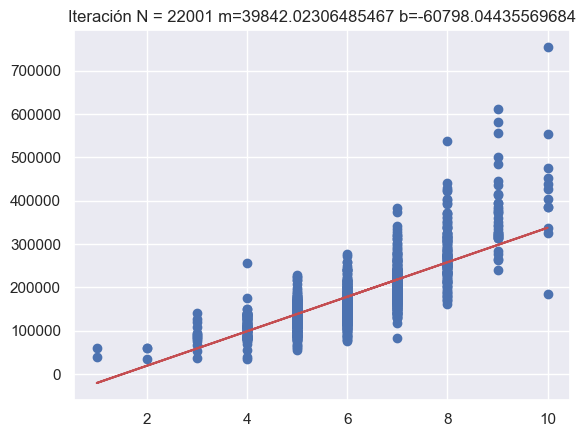

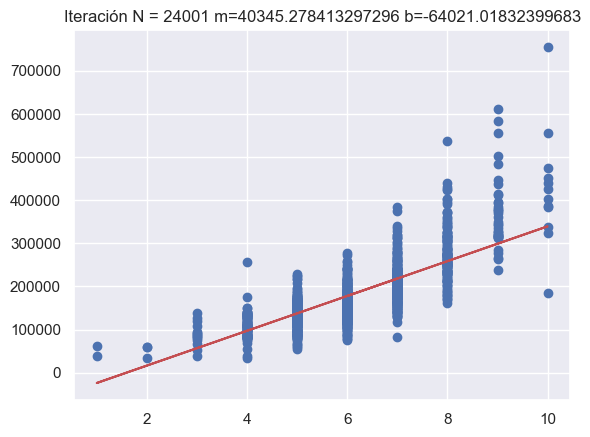

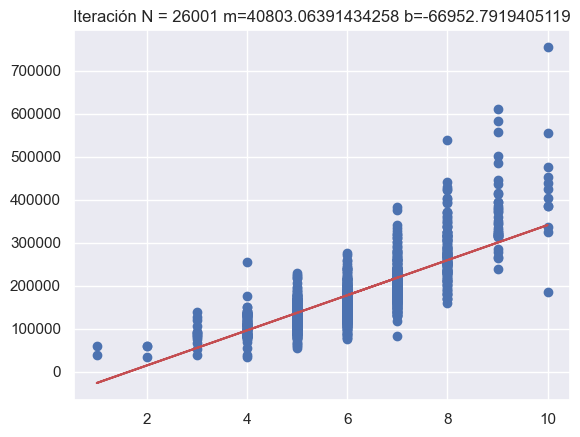

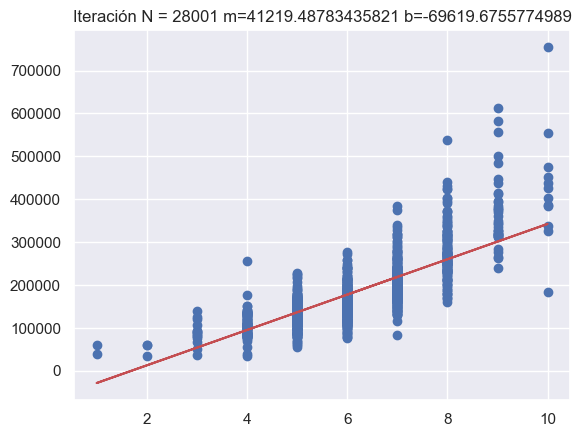

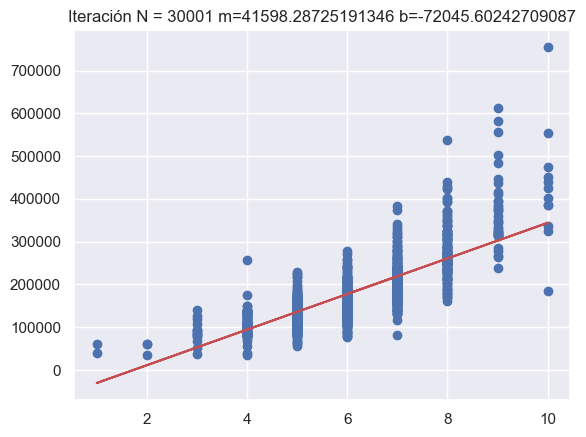

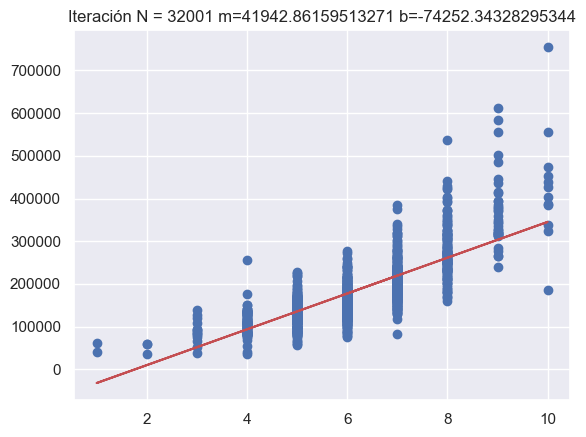

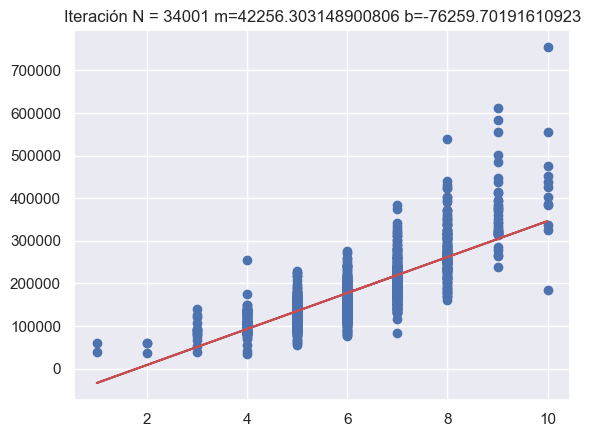

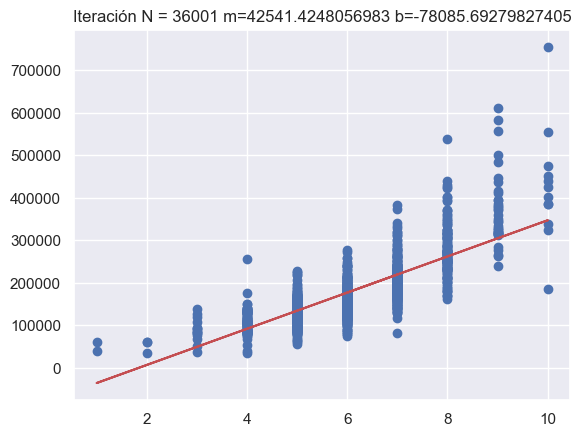

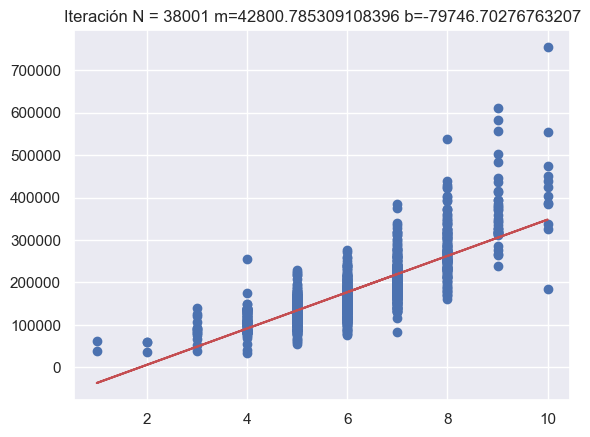

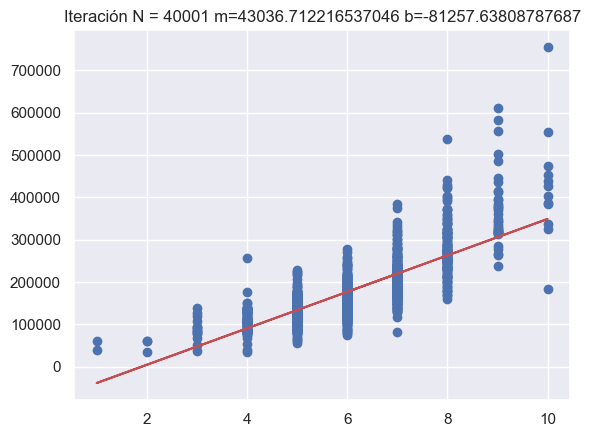

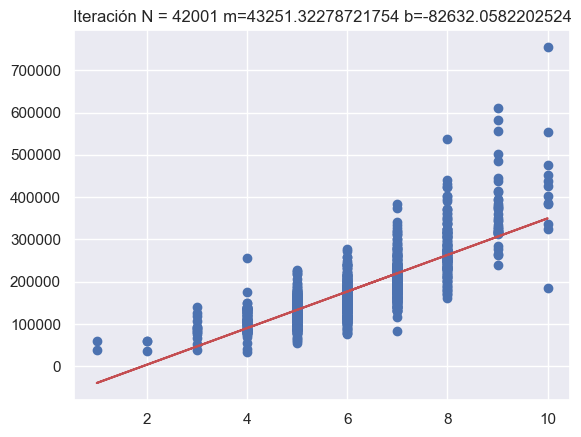

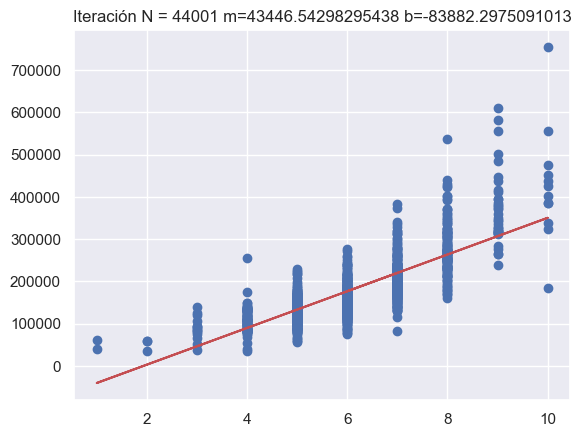

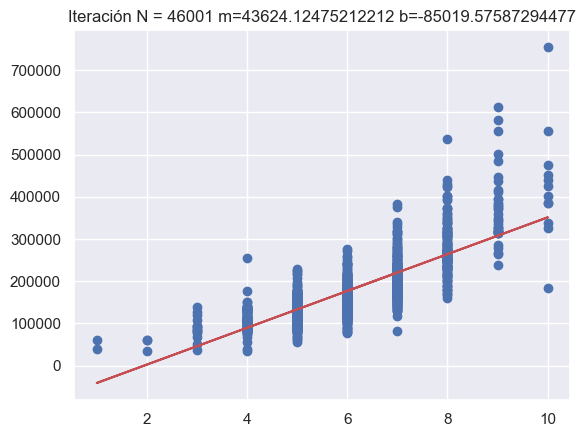

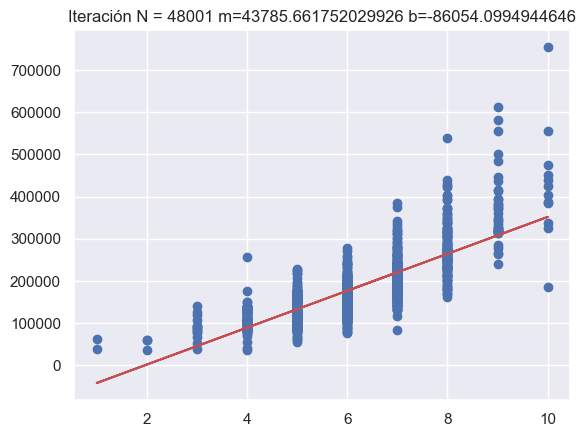

In [216]:
graficar_modelo(data_entrenamiento[:,1],data_entrenamiento[:,0], overall_test,2000)

### 1stFlrSF( learning rate = 0.0000001)

Error iteracion : 500 1968088986.2915235
Error iteracion : 1000 1968084878.1458607
Error iteracion : 1500 1968080770.388528
Error iteracion : 2000 1968076663.019488
Error iteracion : 2500 1968072556.0387046
Error iteracion : 3000 1968068449.4461408
Error iteracion : 3500 1968064343.2417603
Error iteracion : 4000 1968060237.4255254
Error iteracion : 4500 1968056131.9974005
Error iteracion : 5000 1968052026.957349
Error iteracion : 5500 1968047922.3053327
Error iteracion : 6000 1968043818.0413165
Error iteracion : 6500 1968039714.1652632
Error iteracion : 7000 1968035610.6771357
Error iteracion : 7500 1968031507.5768983
Error iteracion : 8000 1968027404.8645132
Error iteracion : 8500 1968023302.5399446
Error iteracion : 9000 1968019200.6031554
Error iteracion : 9500 1968015099.0541089
Error iteracion : 10000 1968010997.892769
Error iteracion : 10500 1968006897.119099
Error iteracion : 11000 1968002796.7330616
Error iteracion : 11500 1967998696.7346203
Error iteracion : 12000 1967994597.1

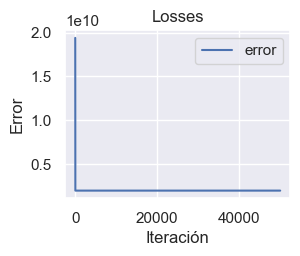

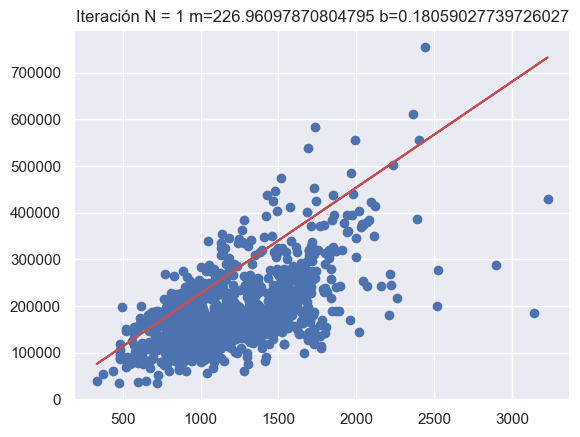

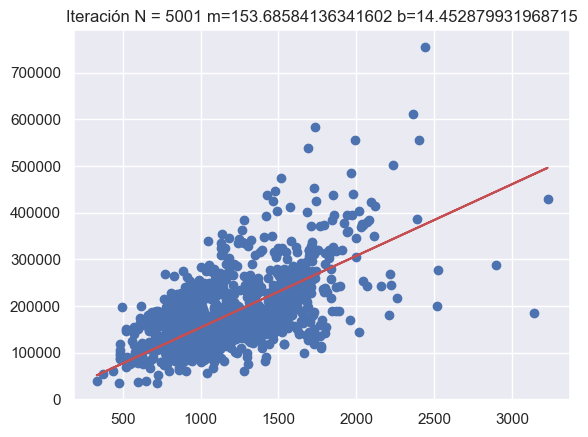

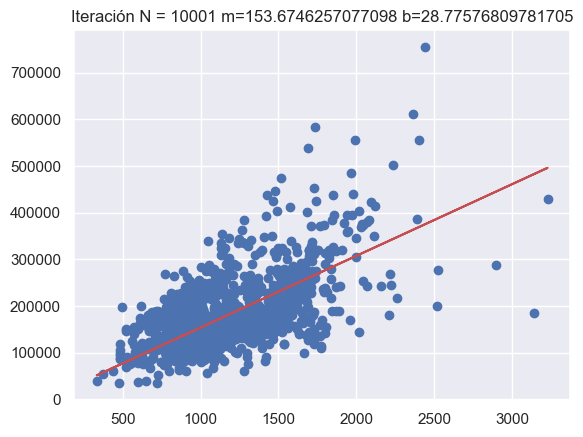

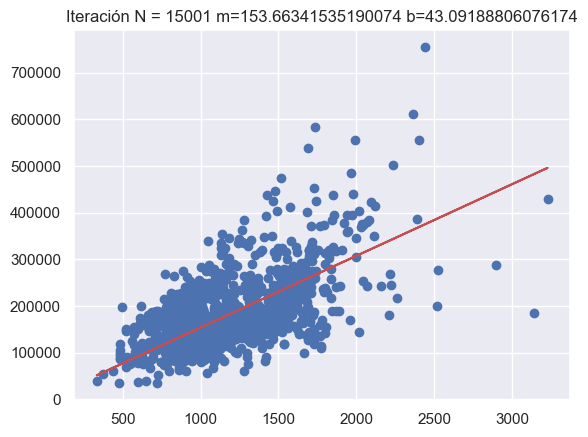

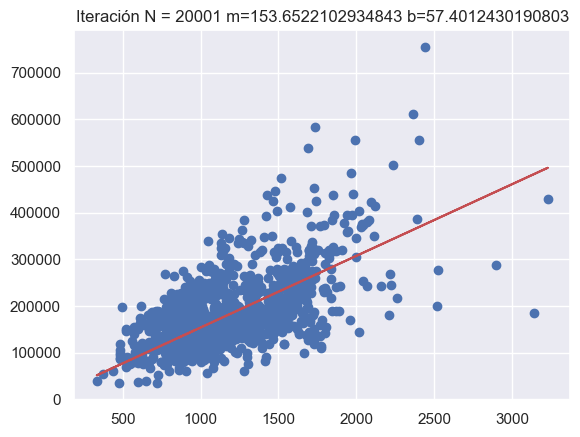

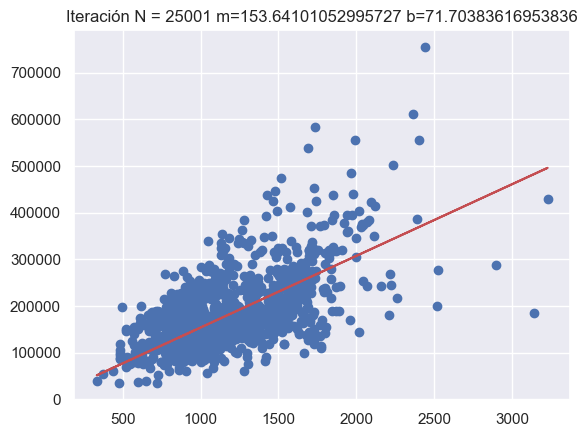

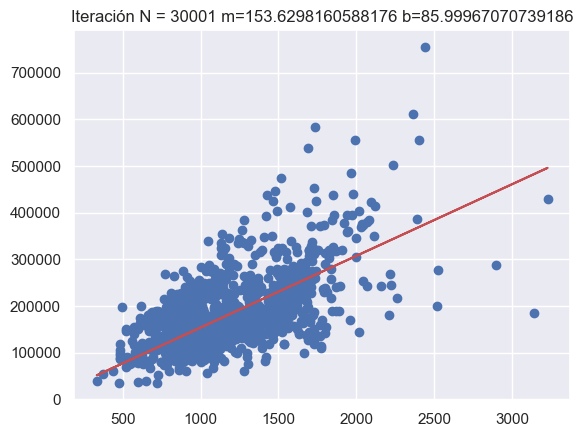

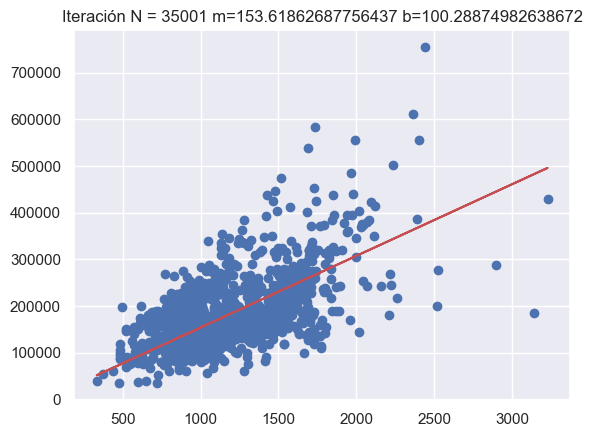

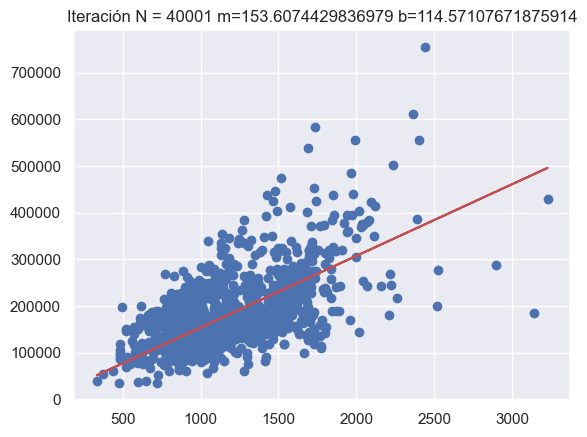

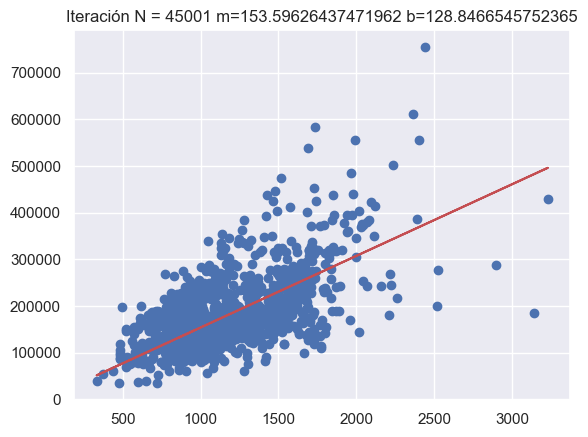

In [217]:

epochs = 50000
error = 500
lr = 0.000001
modelo1stFlr, errores_2 = entre_function(data_entrenamiento[:,2],data_entrenamiento[:,0],epochs,error,lr)
grafica_error(errores_2)
grafica_modelo(data_entrenamiento[:,2],data_entrenamiento[:,0], modelo1stFlr, 5000)

Error iteracion : 2000 16742780852.761808
Error iteracion : 4000 14469592867.149725
Error iteracion : 6000 12533070916.162483
Error iteracion : 8000 10883352712.341042
Error iteracion : 10000 9477960876.474907
Error iteracion : 12000 8280709187.74383
Error iteracion : 14000 7260770824.870555
Error iteracion : 16000 6391884606.429488
Error iteracion : 18000 5651678791.797029
Error iteracion : 20000 5021095031.296431
Error iteracion : 22000 4483897632.832394
Error iteracion : 24000 4026255509.1237173
Error iteracion : 26000 3636386041.095325
Error iteracion : 28000 3304251687.269212
Error iteracion : 30000 3021301527.1513634
Error iteracion : 32000 2780251083.616059
Error iteracion : 34000 2574894754.9350586
Error iteracion : 36000 2399946026.76485
Error iteracion : 38000 2250901349.7112627
Error iteracion : 40000 2123924177.4549432
Error iteracion : 42000 2015746179.5365136
Error iteracion : 44000 1923583085.129451
Error iteracion : 46000 1845062990.8622224
Error iteracion : 48000 17781

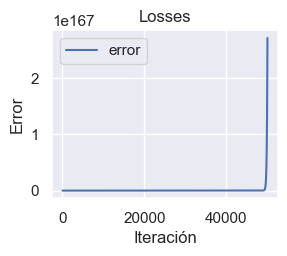

In [218]:
epochs = 50000
error = 2000
lr = 0.000001
overall_test, errores_over = entre_function(data_entrenamiento[:,1],data_entrenamiento[:,0],epochs,error,lr)
grafica_error(errores)

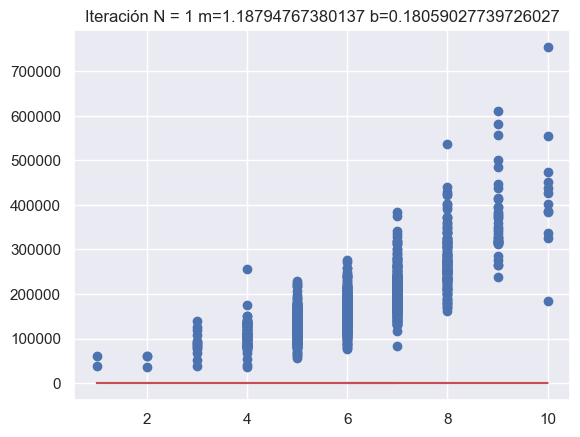

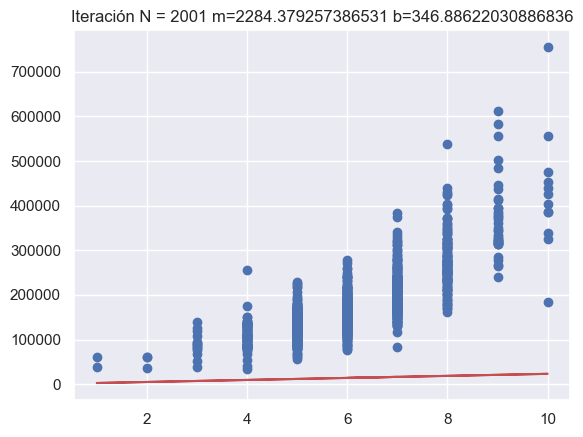

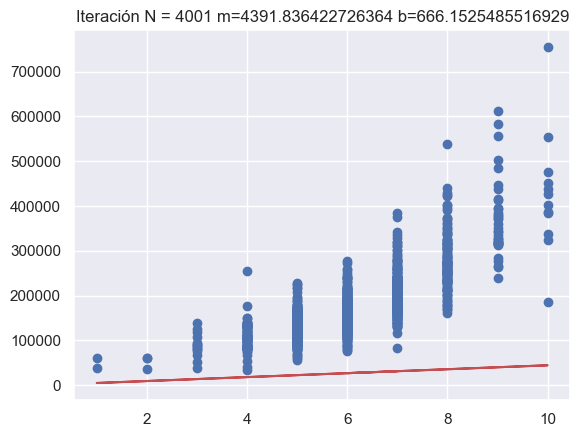

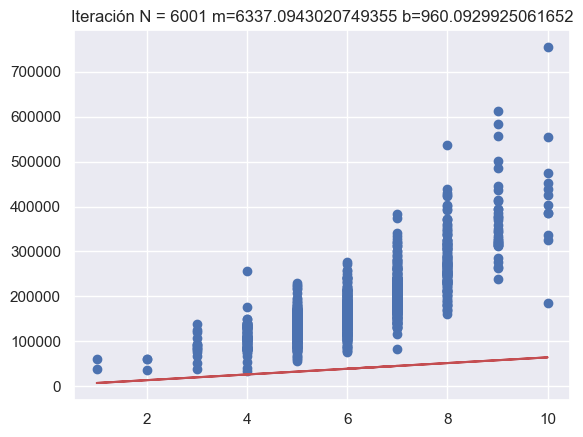

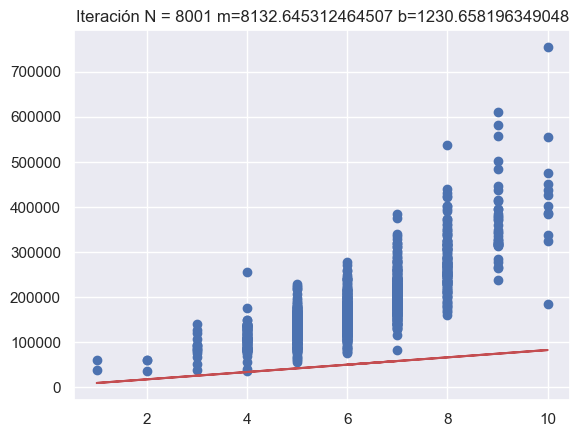

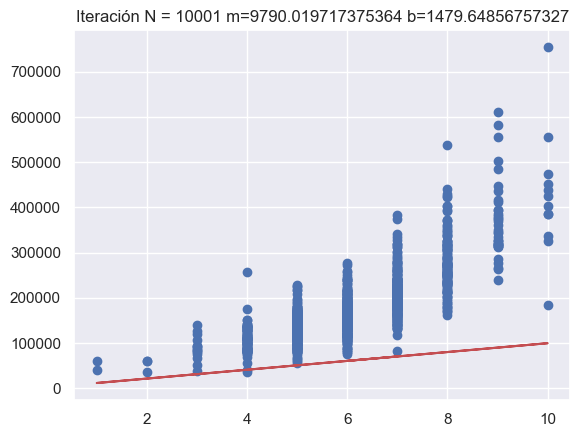

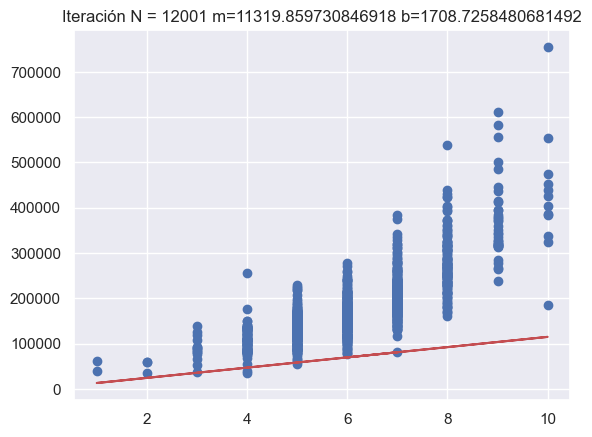

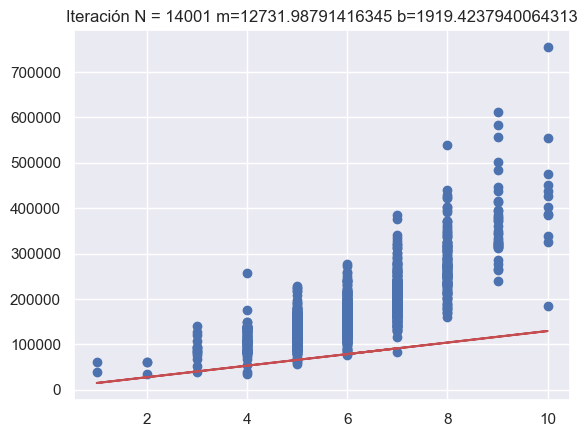

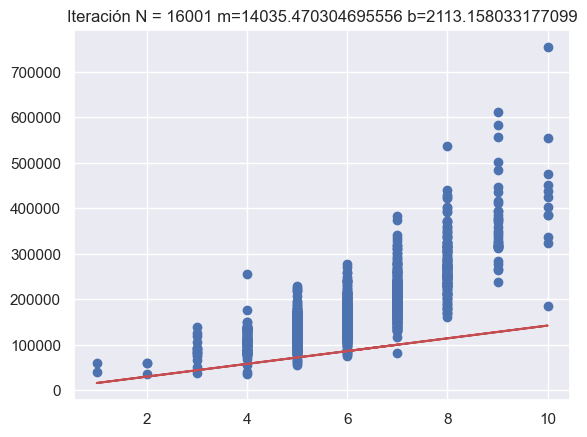

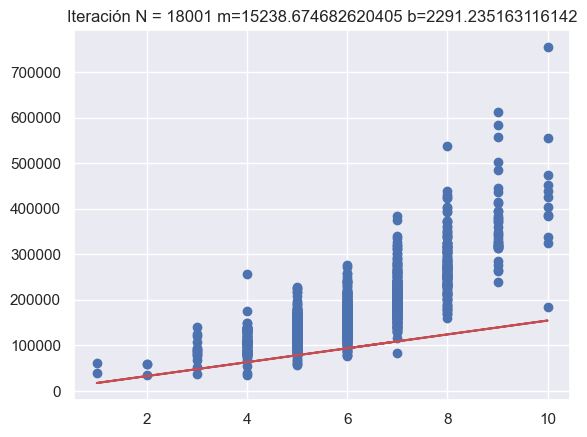

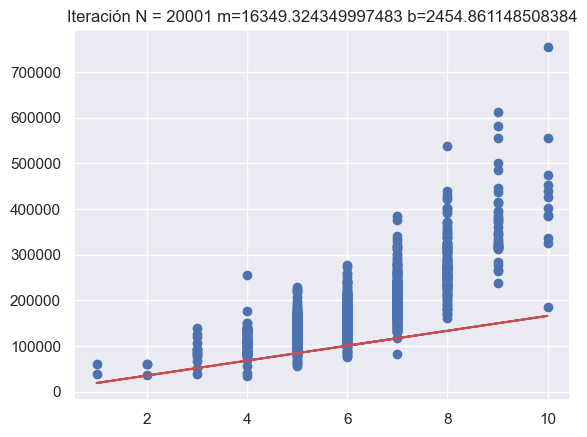

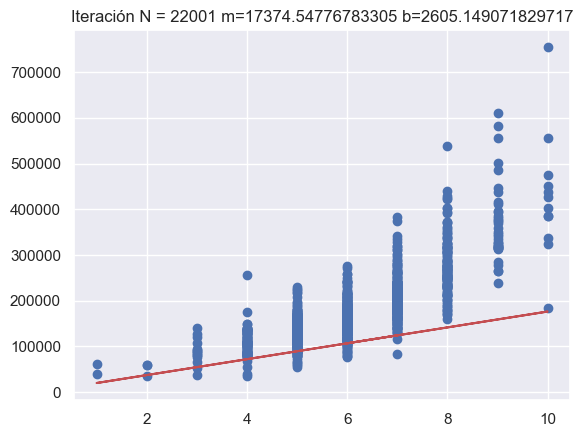

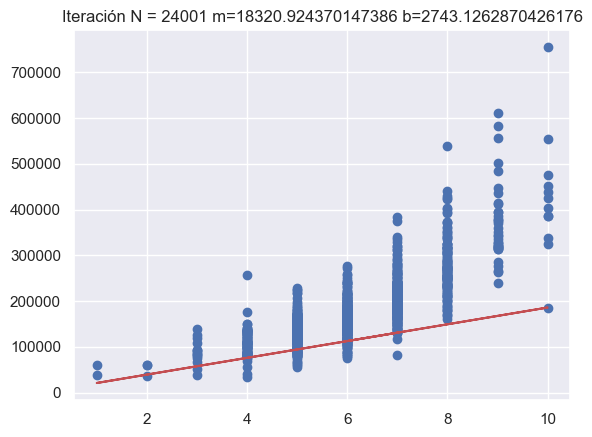

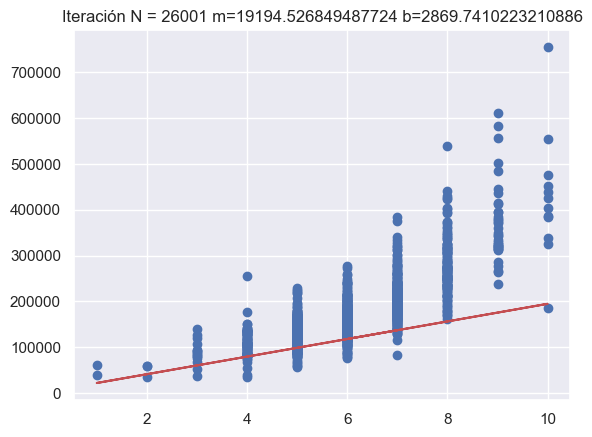

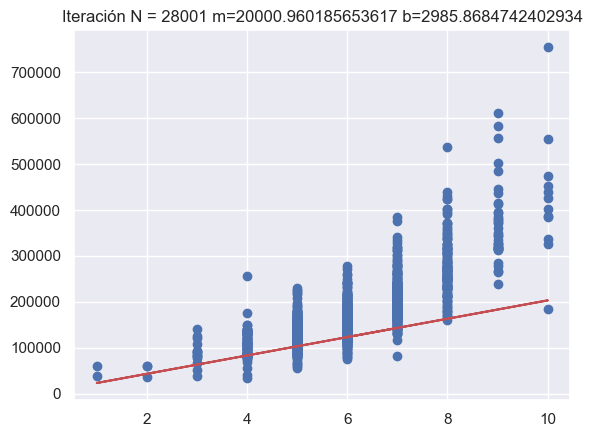

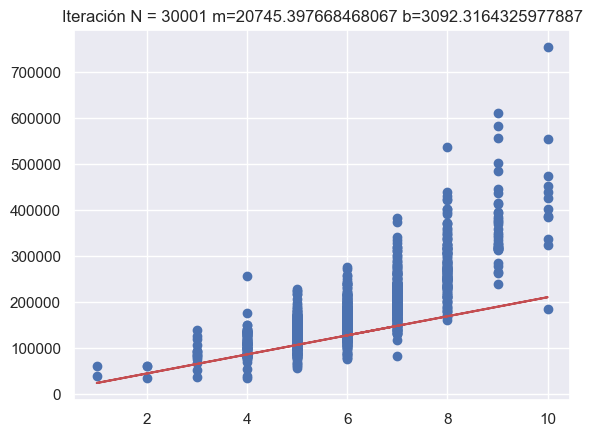

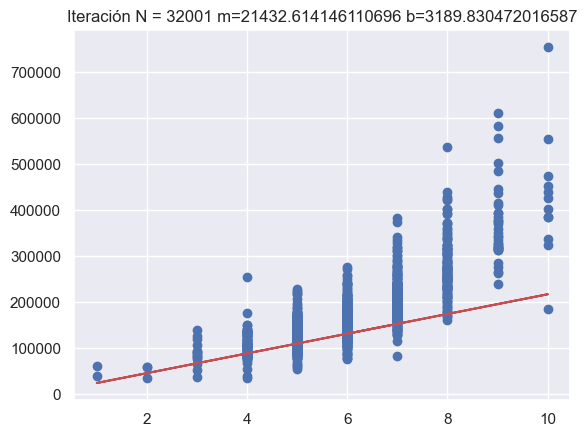

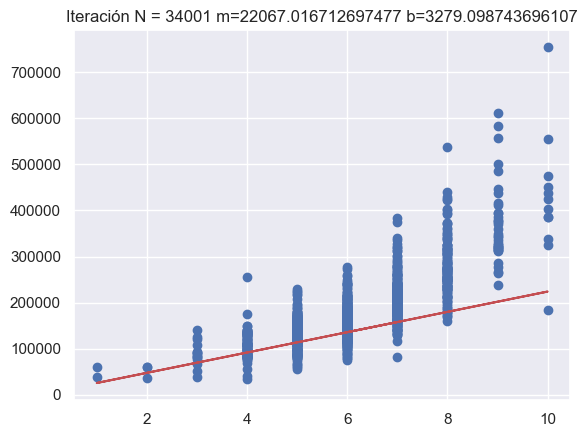

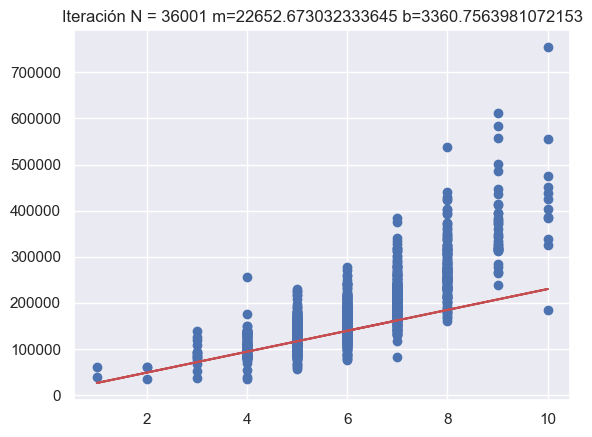

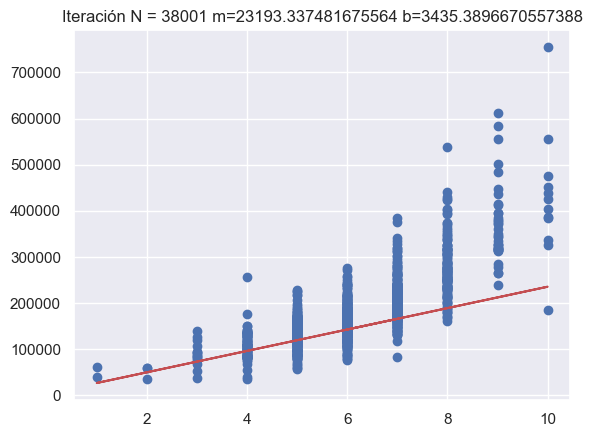

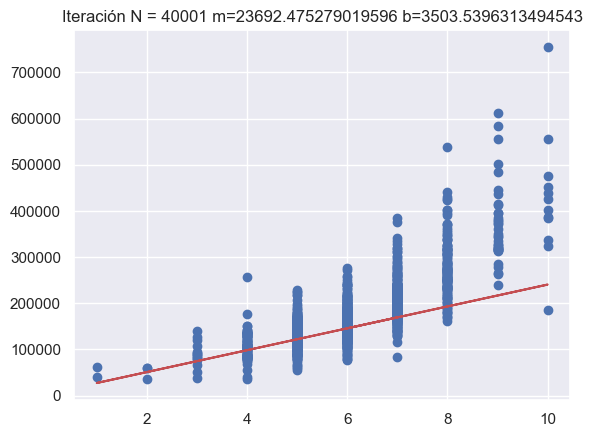

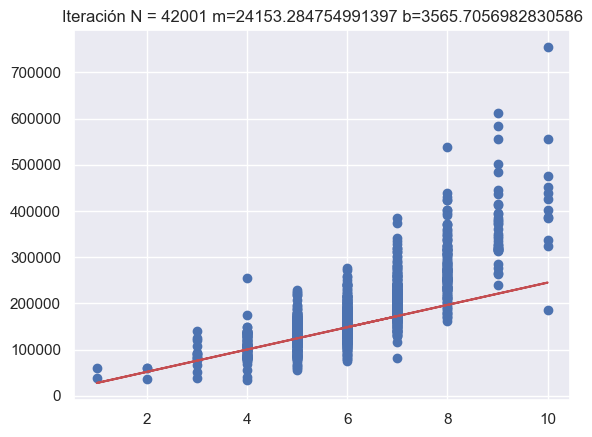

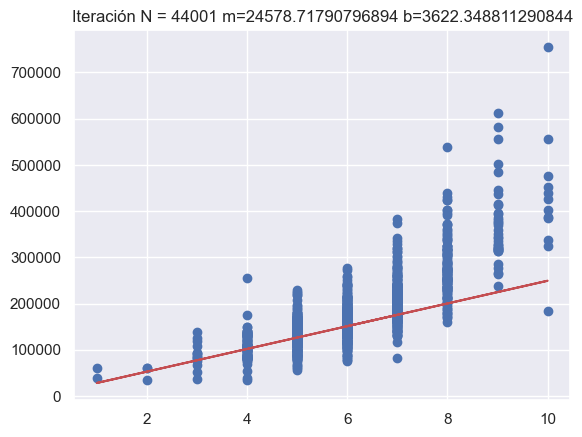

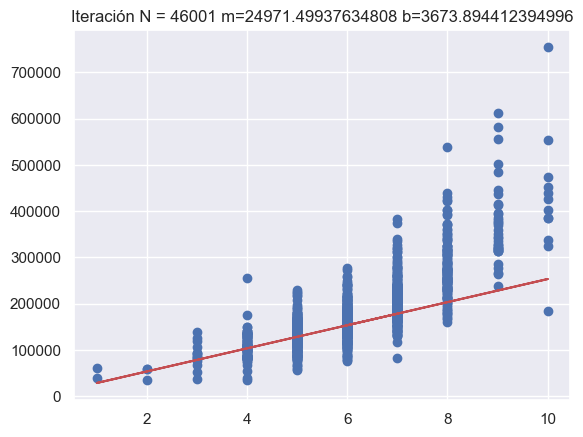

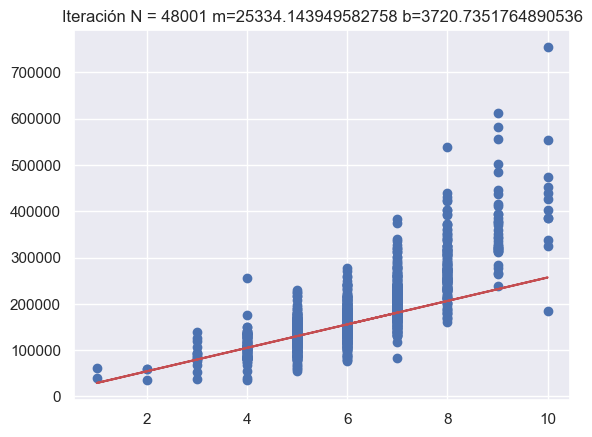

In [219]:
graficar_modelo(data_entrenamiento[:,1],data_entrenamiento[:,0], overall_test,2000)

### Sckilearn - OverallQuality

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
x = data_entrenamiento[:,1].reshape(-1,1)
y = data_entrenamiento[:,0].reshape(-1,1)
overall_scklr = LinearRegression()
overall_scklr.fit(x,y)

LinearRegression()

In [214]:
firstfloor_scklr = LinearRegression()
firstfloor_scklr.fit(x,y)

LinearRegression()